# Bank-data

## 1. Exploración de Datos
En esta primere parte leeremos el archivo garantizando que posibles caracteres latinos se incluyan en la lectura

In [1]:
import pandas as pd

encoding = 'iso-8859-1'    
delimiter = ';'
filename = '../bank-data.csv'

bank = pd.read_csv(filename, 
                   delimiter = delimiter,
                   encoding = encoding)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1.0,-1.0,0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1.0,-1.0,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1.0,-1.0,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1.0,-1.0,0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1.0,-1.0,0,unknown,no


### Verificando las llaves
En esta etapa verificamos que llaves tiene el archivo.

In [2]:
list(bank.keys())

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

### Verificando el tamaño del archivo

In [3]:
bank.shape

(45211, 17)

### Estadísticas
Generamos la estadistica básica

In [4]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45210.000000,45207.000000,45211.000000,45209.000000,45210.000000,45208.000000,45211.000000
mean,40.935965,1362.349946,15.806419,258.166626,2.763858,40.192134,0.580323
std,10.618752,3044.886973,8.322476,257.532767,3.098053,100.121122,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Verificando caracteristicas adicionales
Como se hace necesario conocer las ausencias y el tipo de datos nominales se generan unas lineas para este fin

In [5]:
size = len(bank)
keys = bank.keys()

nulls = []
values = []
Nvalues = []
for key in keys:
    nulls.append(len(bank[bank[key].isna() == True][key]))
    try:
        values.append(bank[key].unique())
        Nvalues.append(len(bank[key].unique()))
    except:
        values.append('NA')
        Nvalues.append('NA')

data = {'keys': keys, 
        'Nulls': nulls, 
        'Values': values,
        '# Values': Nvalues}

Details = pd.DataFrame(data=data)
Details

,keys,Nulls,Values,# Values
0,age,1,"[58.0, 44.0, 33.0, 47.0, 35.0, 28.0, 42.0, 43....",78
1,job,5,"[management, technician, entrepreneur, blue-co...",14
2,marital,6,"[married, single, divorced, nan]",4
3,education,7,"[tertiary, secondary, unknown, nan, primary]",5
4,default,4,"[no, nan, yes]",3
5,balance,4,"[2143.0, 29.0, 2.0, 1506.0, 1.0, 231.0, nan, 1...",7169
6,housing,4,"[yes, no, nan]",3
7,loan,2,"[no, yes, nan]",3
8,contact,8,"[unknown, nan, cellular, telephone]",4
9,day,0,"[5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21...",31


### Aplicando técnicas de Visualización
#### Utiliando libreria Seaborn

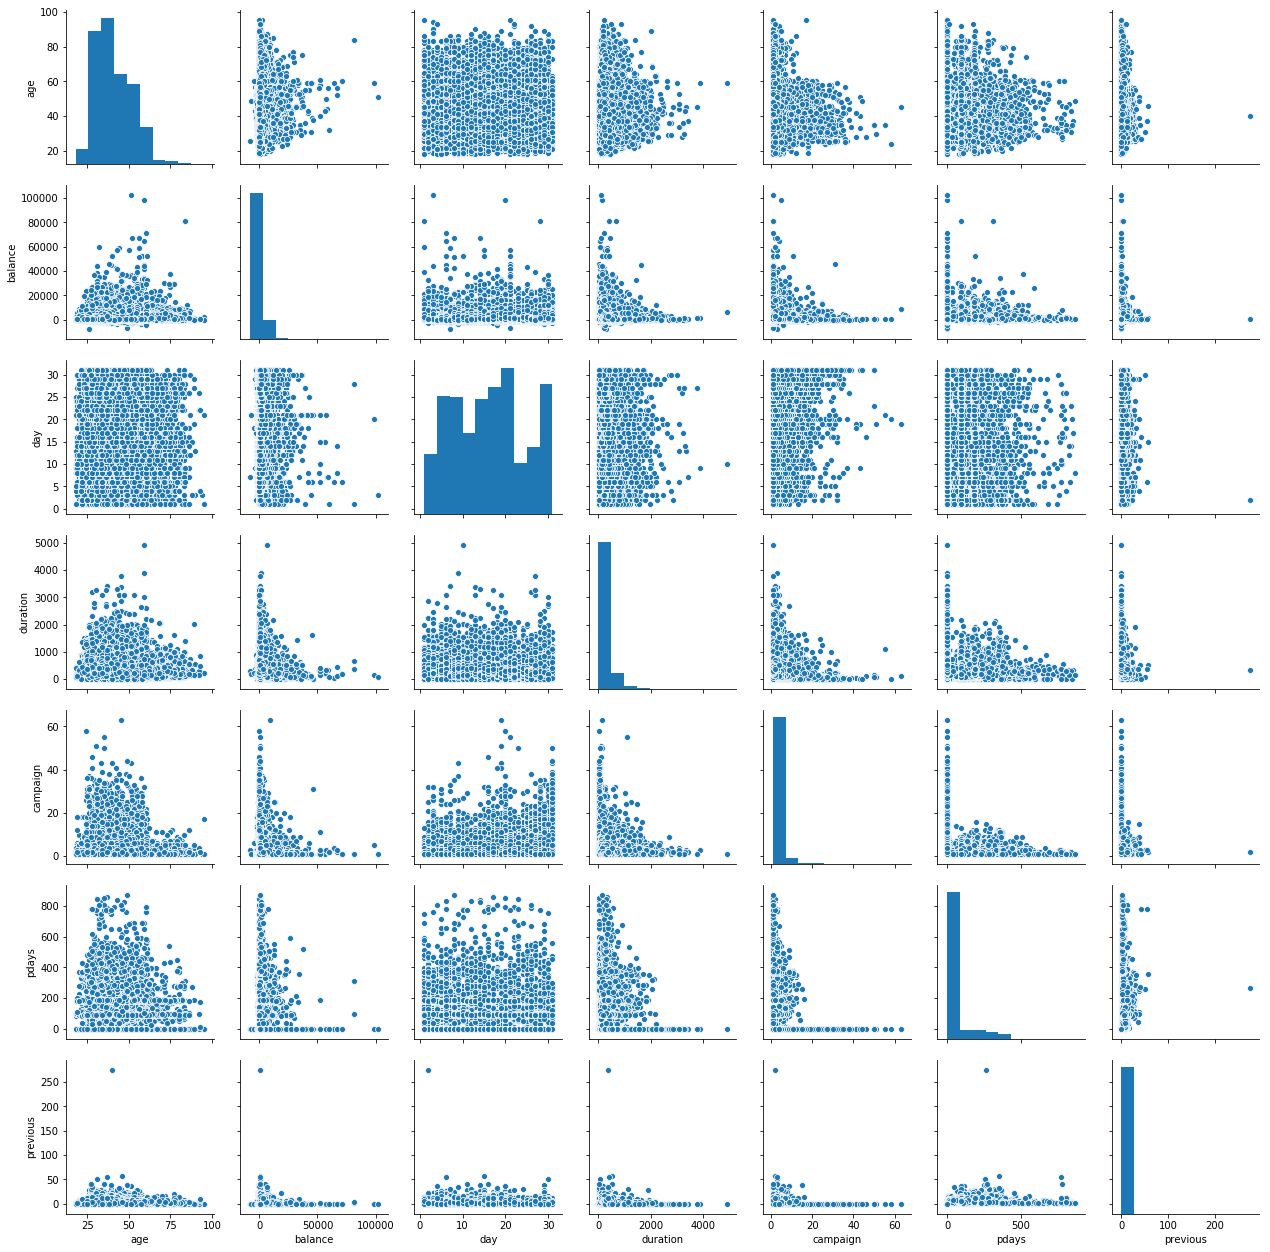

In [11]:
import matplotlib.pyplot as pt
import seaborn as sb

sb.pairplot(bank,
            palette = 'coolwarm'
            )

#### Generando Histogramas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020EBEC72CC0>,
      dtype=object)

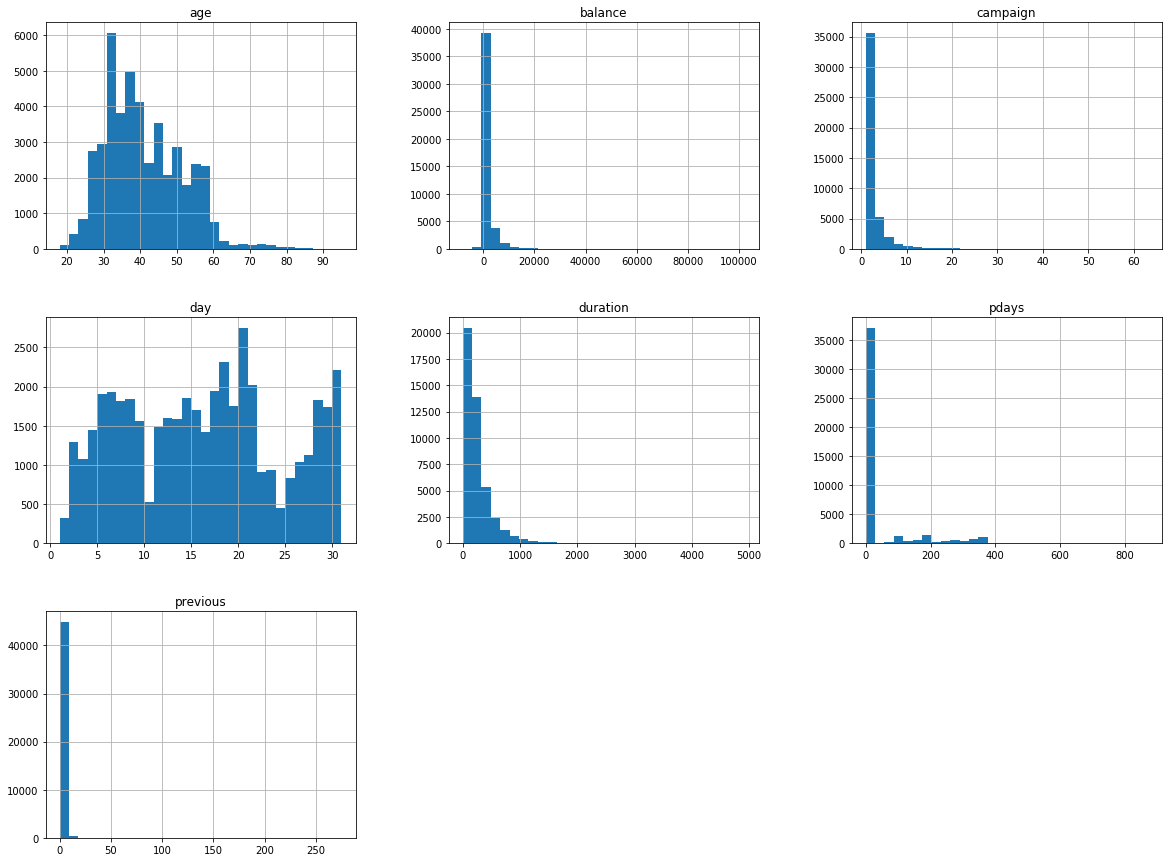

In [7]:
bank.hist(bins=30, figsize=(20,15))

#### Generando Diagramas de Caja
Debido a las distintas escalas de los datos se generaron diagramas de caja independientes. En estos diagramas se puede observar que existes múltiples valores atipicos.

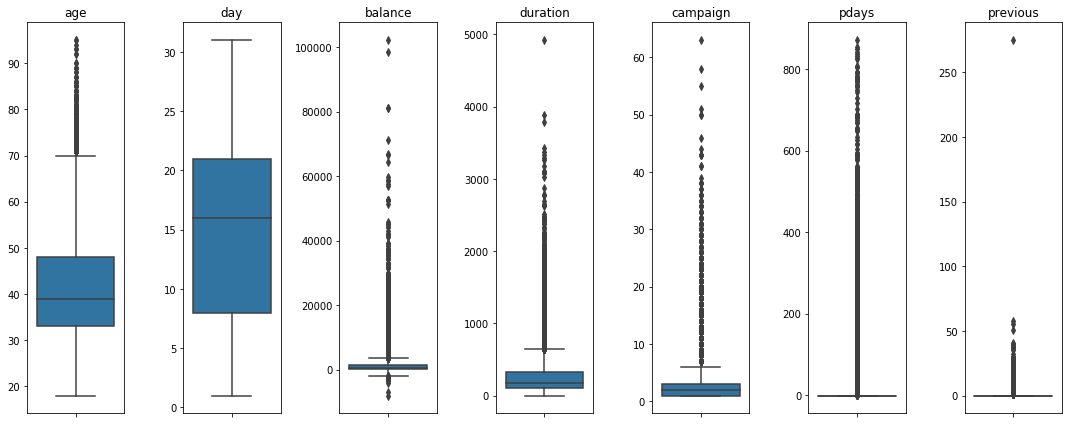

In [8]:
fig, axs = pt.subplots(1, 7, figsize=(15,6))

data = ['age', 'day', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for i in range(len(data)):
    axs[i].set_title(data[i])
    sb.boxplot(bank[[data[i]]], ax = axs[i], orient = 'v')

pt.tight_layout()

## 2. Preparación de datos

### Remover ausencias
Debido a que las ausencias no son demasiadas se decide eliminarlas del dataset. En este caso se eliminan 21 registros por presentar ausencias.

In [9]:
for key in keys:
    bank.drop(bank[bank[key].isna() == True].index, inplace = True)
bank.shape

(45190, 17)

Se realiza verificación para las ausencias, encontrando que no queda ninguna.

In [10]:
size = len(bank)
keys = bank.keys()

nulls = []
values = []
Nvalues = []
for key in keys:
    nulls.append(len(bank[bank[key].isna() == True][key]))
    try:
        values.append(bank[key].unique())
        Nvalues.append(len(bank[key].unique()))
    except:
        values.append('NA')
        Nvalues.append('NA')

data = {'keys': keys, 
        'Nulls': nulls, 
        'Values': values,
        '# Values': Nvalues}

Details = pd.DataFrame(data=data)
Details

,keys,Nulls,Values,# Values
0,age,0,"[58.0, 44.0, 33.0, 47.0, 42.0, 43.0, 41.0, 29....",77
1,job,0,"[management, technician, entrepreneur, blue-co...",13
2,marital,0,"[married, single, divorced]",3
3,education,0,"[tertiary, secondary, unknown, primary]",4
4,default,0,"[no, yes]",2
5,balance,0,"[2143.0, 29.0, 2.0, 1506.0, 1.0, 121.0, 593.0,...",7167
6,housing,0,"[yes, no]",2
7,loan,0,"[no, yes]",2
8,contact,0,"[unknown, cellular, telephone]",3
9,day,0,"[5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21...",31


### Selección de Variables
En una primera fase se decide eliminar las variables.